# Gráfico de Pie
Gráfico circular dividido en secciones. Nos sirve para mostrar las diferencias entre las **proporciones** o partes de un todo. Es uno de los gráficos más utilizados, pero también uno de los más mal utilizados.   
**Otros nombres**: Gráfico Circular, Gráfico de Dona, Donut Chart, Gráfico de Tarta

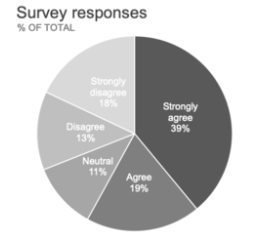


### Cuando utilizar
- Quiero comparar partes porcentuales de un todo

### Cuando no utilizar
- Cuando no quiero saber acerca de las proporciones, o cuando no o no puedo calcular valores porcentuales
- Si tengo muchas categorias y las quiero mostrar todas el gráfico se vuelve ilegible
- Cuando una categoría representa +95% de los datos se vuelve una visualización sin utilidad
- Las categorías son porcentualmente identicas a simple vista (preferible utilizar bar chart en este caso!)

### Ejemplos de Uso
- Si soy dueño de una página web, me gustaría saber cual es la proporcion de usuarios visitan mi página desde un Celular, Tablet o PC de escritorio.
- En un banco, me interesaría saber cual es la proporción que existe entre los diferentes tipos de cuentas bancarias de los usuarios

### Consejos
- Se lo puede utilizar en conjunto con los graficos de barras para mostrar la misma información con un enfoque diferente
- No es habitual presentarlo solo
- No utilizar dos pie charts para compararlos entre ellos. Causa confusión y es dificil de leer y comparar, incluso manteniendo un mismo sistema de colores!
- Evita los pie charts en 3D. Son muy difíciles de leer.
- De ser posible, ordena los segmentos de mayor a menor empezando por el centro (90 grados)
- Es un gráfico de dificil interpretacion. **A los humanos no se nos da bien comparar ángulos al ojo**. Tengan siempre esto presente.
- Utiliza colores solo cuando sea relevante. Por ejemplo para resaltar una categoria.

## En esta clase
### Datos
Información sobre los pasajeros del Titanic
### Objetivo
1. Cual es el porcentaje de pasajeros HOMBRES y MUJERES del Titanic

## Referencias
- https://datavizcatalogue.com/ES/metodos/graficos_de_tarta.html
- https://chartio.com/learn/charts/how-to-choose-pie-chart-vs-bar-chart/
- https://www.storytellingwithdata.com/blog/2020/5/14/what-is-a-pie-chart

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
pasajeros = df.groupby('Sex').count()
pasajeros

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


Text(0.5, 1.0, '')

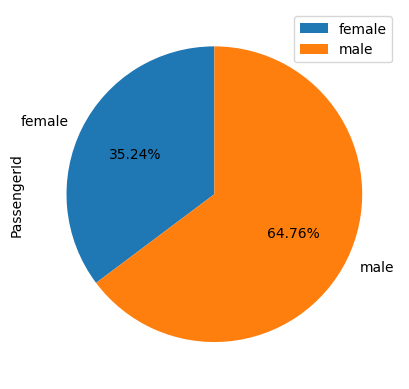

In [11]:
# Grafico de Pie con Pandas 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html#matplotlib.axes.Axes.pie
pasajeros.plot.pie(
    y='PassengerId', 
    startangle=90,
    autopct='%1.2f%%'
)
plt.title('')

In [12]:
# Grafico de Pie / Dona con Plotly
# https://plotly.com/python/pie-charts/
pasajeros2 = pasajeros.reset_index()
fig = px.pie(
    pasajeros2, 
    names='Sex', 
    values='PassengerId', 
    title='Proporcion de pasajeros del Titanic por sexo',
    hole=0.5
)
fig.show()

,Numero De Cuentas
Tipo de Cuentas,
Ahorros,70000
Corriente,30000
Estudiantes,1000


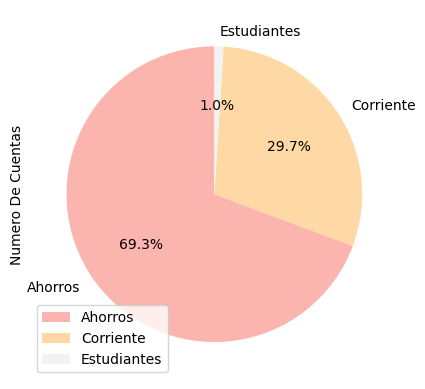

In [26]:
ejemplo1 = pd.DataFrame({
    'Tipo de Cuentas': ['Ahorros', 'Corriente', 'Estudiantes'],
    'Numero De Cuentas': [70000, 30000, 1000]
}).set_index('Tipo de Cuentas')
ejemplo1.plot.pie( # Agarra el indice como etiquetas por defecto
    y='Numero De Cuentas', 
    startangle=90,
    autopct='%1.1f%%',
    colormap='Pastel1' # Colores diferentes
)
ejemplo1